<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [186]:
# Set your student number
student_number =400101956 
Name = 'Mohammad'
Last_Name = 'Morsali'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

In [187]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [188]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [189]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())


Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [190]:
## FILL HERE
# input_dim = .....
# Calculate the number of classes and input dimension
class_count = len(train_set.classes)
first_layer_input_dim = train_set[0][0].numel()  # Using numel() to get the total number of elements

# Improved print statements with formatted strings
print(f"Total number of classes: {class_count}")
print(f"Input dimension of the initial layer: {first_layer_input_dim}")

# Additional improvements: Checking if the dataset is non-empty and handling exceptions
if len(train_set) > 0:
    try:
        sample_data = train_set[0][0]
        sample_shape = sample_data.shape
        sample_dimension = sample_data.numel()
        
        print(f"Sample data shape: {sample_shape}")
        print(f"Sample data total number of elements: {sample_dimension}")
    except Exception as e:
        print(f"An error occurred while processing the dataset: {e}")
else:
    print("The training set is empty.")


Total number of classes: 10
Input dimension of the initial layer: 784
Sample data shape: torch.Size([1, 28, 28])
Sample data total number of elements: 784


In [191]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

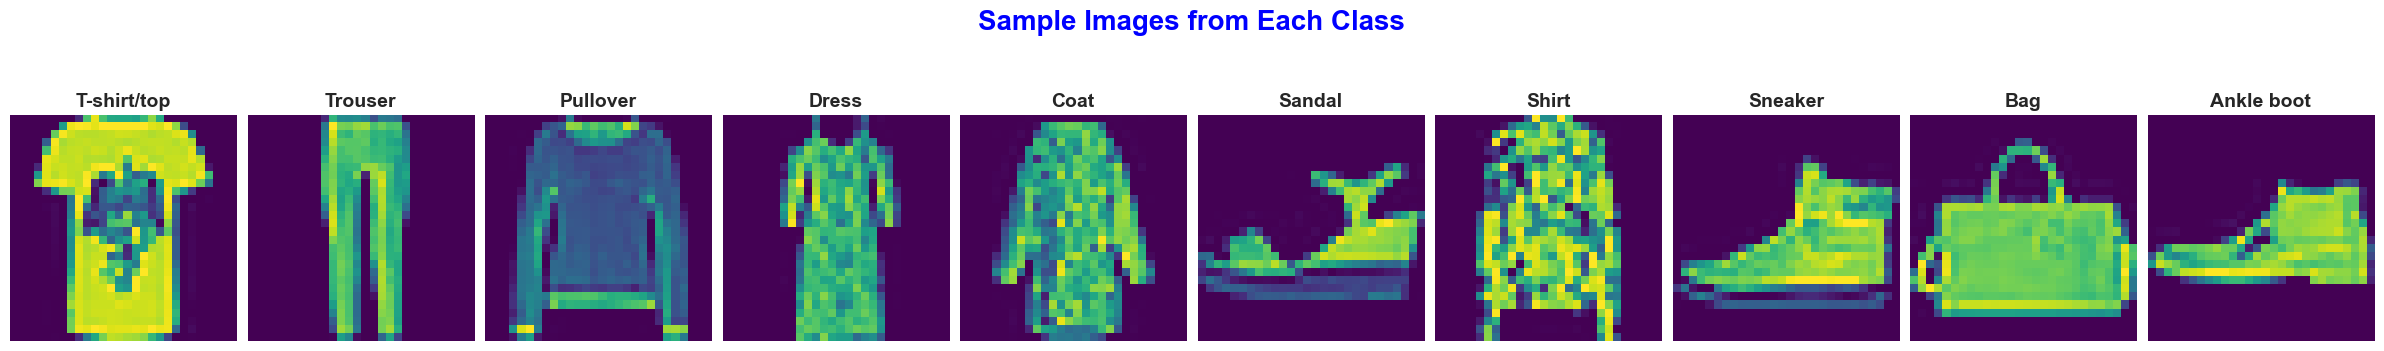

In [192]:
import seaborn as sns

# Set a theme for seaborn
sns.set_theme()

# Improved version with better variable names, methods, and additional features
total_classes = len(train_set.classes)
fig, axes = plt.subplots(nrows=1, ncols=total_classes, figsize=(24, 4))

for idx, axis in enumerate(axes):
    # Select a random index for each class
    class_indices = np.where(test_set.targets == idx)[0]
    random_index = np.random.choice(class_indices)
    
    # Retrieve and process the image
    image_tensor = test_set[random_index][0]
    image_array = image_tensor.permute(1, 2, 0).numpy()  # Use permute instead of transpose for readability

    # Display the image
    axis.imshow(image_array, cmap='viridis')  # Use viridis colormap for better contrast
    axis.set_title(train_set.classes[idx], fontsize=14, fontweight='bold')
    axis.axis('off')
    
# Add a main title and improve layout
plt.suptitle('Sample Images from Each Class', fontsize=20, fontweight='bold', color='blue')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.subplots_adjust(wspace=0.05, hspace=0.05)  # Reduce space between subplots
plt.show()

## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [193]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [194]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (first_layer_input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, class_count)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [195]:
def affine_forward(x, w, b):
    affine_output = torch.matmul(x, w) + b
    return affine_output

def relu(x):
    ## FILL HERE
    return x.clamp(min=0)

Function `model` returns output of the whole model for the input `x` using the parameters:

In [196]:
def model(x: torch.Tensor, parameters, num_layers=num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)

    for layer_index in range(num_layers):
        w = parameters.get('w{}'.format(layer_index))
        b = parameters.get('b{}'.format(layer_index))
        x = affine_forward(x, w, b)
        if layer_index != num_layers - 1:
            x = relu(x)
    
    return x

Implementing cross entropy loss:

In [197]:
def cross_entropy_loss(scores, y):
    n = len(y)
    loss = -scores.exp().div(scores.exp().sum(dim=1, keepdim=True))[range(n), y].log().sum().div(n)
    return loss

Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [198]:
def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    with torch.no_grad():
        for param in parameters.values():
            if param.requires_grad:
                param -= learning_rate * param.grad
                param.grad.clamp_(-1, 1)
                param.grad.zero_()

Training functions:

In [199]:
def accuracy(y_pred: np.ndarray, y_true: np.ndarray):
    acc = np.count_nonzero(y_pred == y_true) / len(y_pred)
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []


    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        loss.backward()
        sgd_optimizer(parameters, learning_rate)
        train_loss += loss.item() * x.size(0)

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch

    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)

    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
        total_loss += loss.item() * x.size(0)

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [200]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch

def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''

    train_loader, test_loader = dataloaders
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(train_loader, learning_rate, epoch)
        test_loss, test_acc = validate(test_loader, epoch, "Test")

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        # Logging progress for better monitoring
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    # Plotting with improvements
    epochs = range(1, num_epochs + 1)

    sns.set(style="whitegrid")

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'o-', label='Train Loss', color='b')
    plt.plot(epochs, test_losses, 'o-', label='Test Loss', color='r')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Loss History', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(epochs)
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'o-', label='Train Accuracy', color='b')
    plt.plot(epochs, test_accuracies, 'o-', label='Test Accuracy', color='r')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Accuracy History', fontsize=16)
    plt.legend(fontsize=12)
    plt.xticks(epochs)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the plot as a file for future reference
    # plt.savefig(f'{model_name}_training_history.png')

    # # Saving model state for reproducibility
    # torch.save({
    #     'epoch': num_epochs,
    #     'model_state_dict': model.state_dict(),
    #     'optimizer_state_dict': optimizer.state_dict(),
    #     'train_loss': train_losses,
    #     'test_loss': test_losses,
    #     'train_acc': train_accuracies,
    #     'test_acc': test_accuracies,
    # }, f'{model_name}_checkpoint.pth')

    return test_accuracies

# Example usage (assuming train and validate functions and dataloaders are defined):
# dataloaders = (train_loader, test_loader)
# train_model(dataloaders, num_epochs=20, learning_rate=0.001, model_name='pytorch_model')

# Call the function and print the final test accuracy



Accuracy of train set: 0.28913333333333335
Accuracy of Test set: 0.35986666666666667
Epoch 1/25, Train Loss: 137440.8873, Train Acc: 0.2891, Test Loss: 13.6329, Test Acc: 0.3599
Accuracy of train set: 0.34836666666666666
Accuracy of Test set: 0.3942833333333333
Epoch 2/25, Train Loss: 127472.5066, Train Acc: 0.3484, Test Loss: 10.2956, Test Acc: 0.3943
Accuracy of train set: 0.5290166666666667
Accuracy of Test set: 0.64055
Epoch 3/25, Train Loss: 76217.7440, Train Acc: 0.5290, Test Loss: 5.9815, Test Acc: 0.6405
Accuracy of train set: 0.6631166666666667
Accuracy of Test set: 0.6985
Epoch 4/25, Train Loss: 52345.8394, Train Acc: 0.6631, Test Loss: 4.7217, Test Acc: 0.6985
Accuracy of train set: 0.7193
Accuracy of Test set: 0.7144833333333334
Epoch 5/25, Train Loss: 44755.5855, Train Acc: 0.7193, Test Loss: 4.3919, Test Acc: 0.7145
Accuracy of train set: 0.7498166666666667
Accuracy of Test set: 0.7385
Epoch 6/25, Train Loss: 40822.2994, Train Acc: 0.7498, Test Loss: 4.1069, Test Acc: 0.7

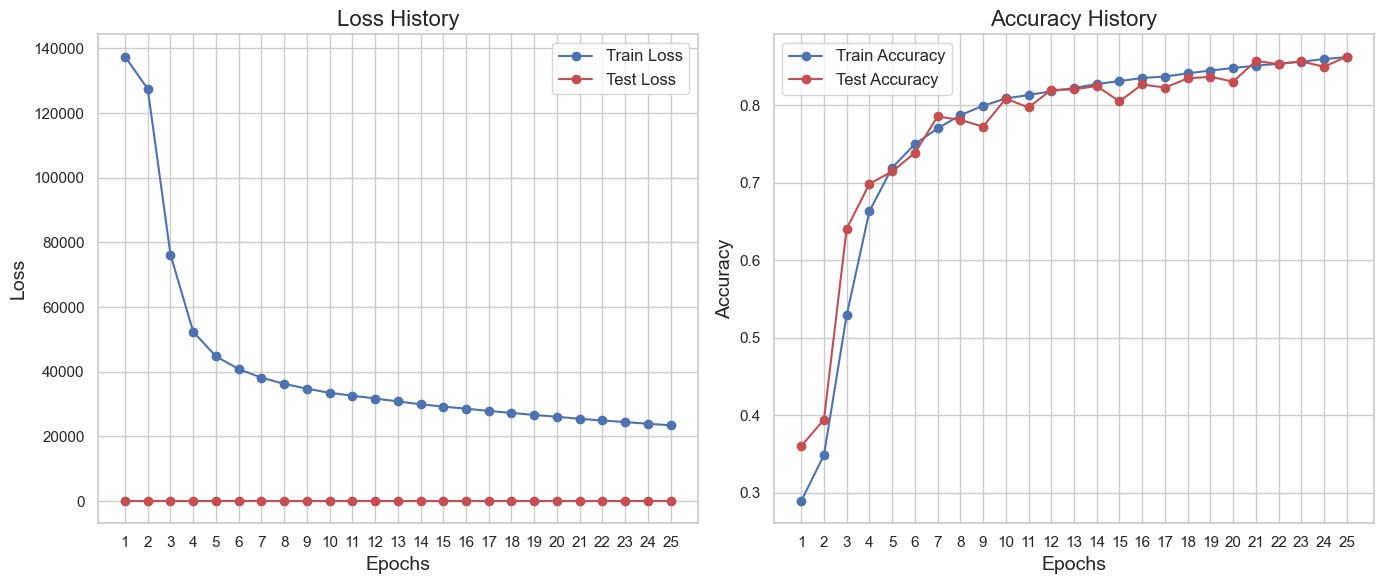

[0.35986666666666667,
 0.3942833333333333,
 0.64055,
 0.6985,
 0.7144833333333334,
 0.7385,
 0.7854833333333333,
 0.78115,
 0.7723166666666667,
 0.8085666666666667,
 0.7971,
 0.81985,
 0.8203666666666667,
 0.8249333333333333,
 0.8049333333333333,
 0.82685,
 0.8228,
 0.8345333333333333,
 0.8368,
 0.8304,
 0.8572,
 0.8531333333333333,
 0.8566,
 0.8497166666666667,
 0.8627166666666667]

In [202]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [ ]:
#print(f'Final test accuracy: {test_accuracies[-1]}')

I printed whole test accuracy and final test upper completely It Is 0.8627

## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

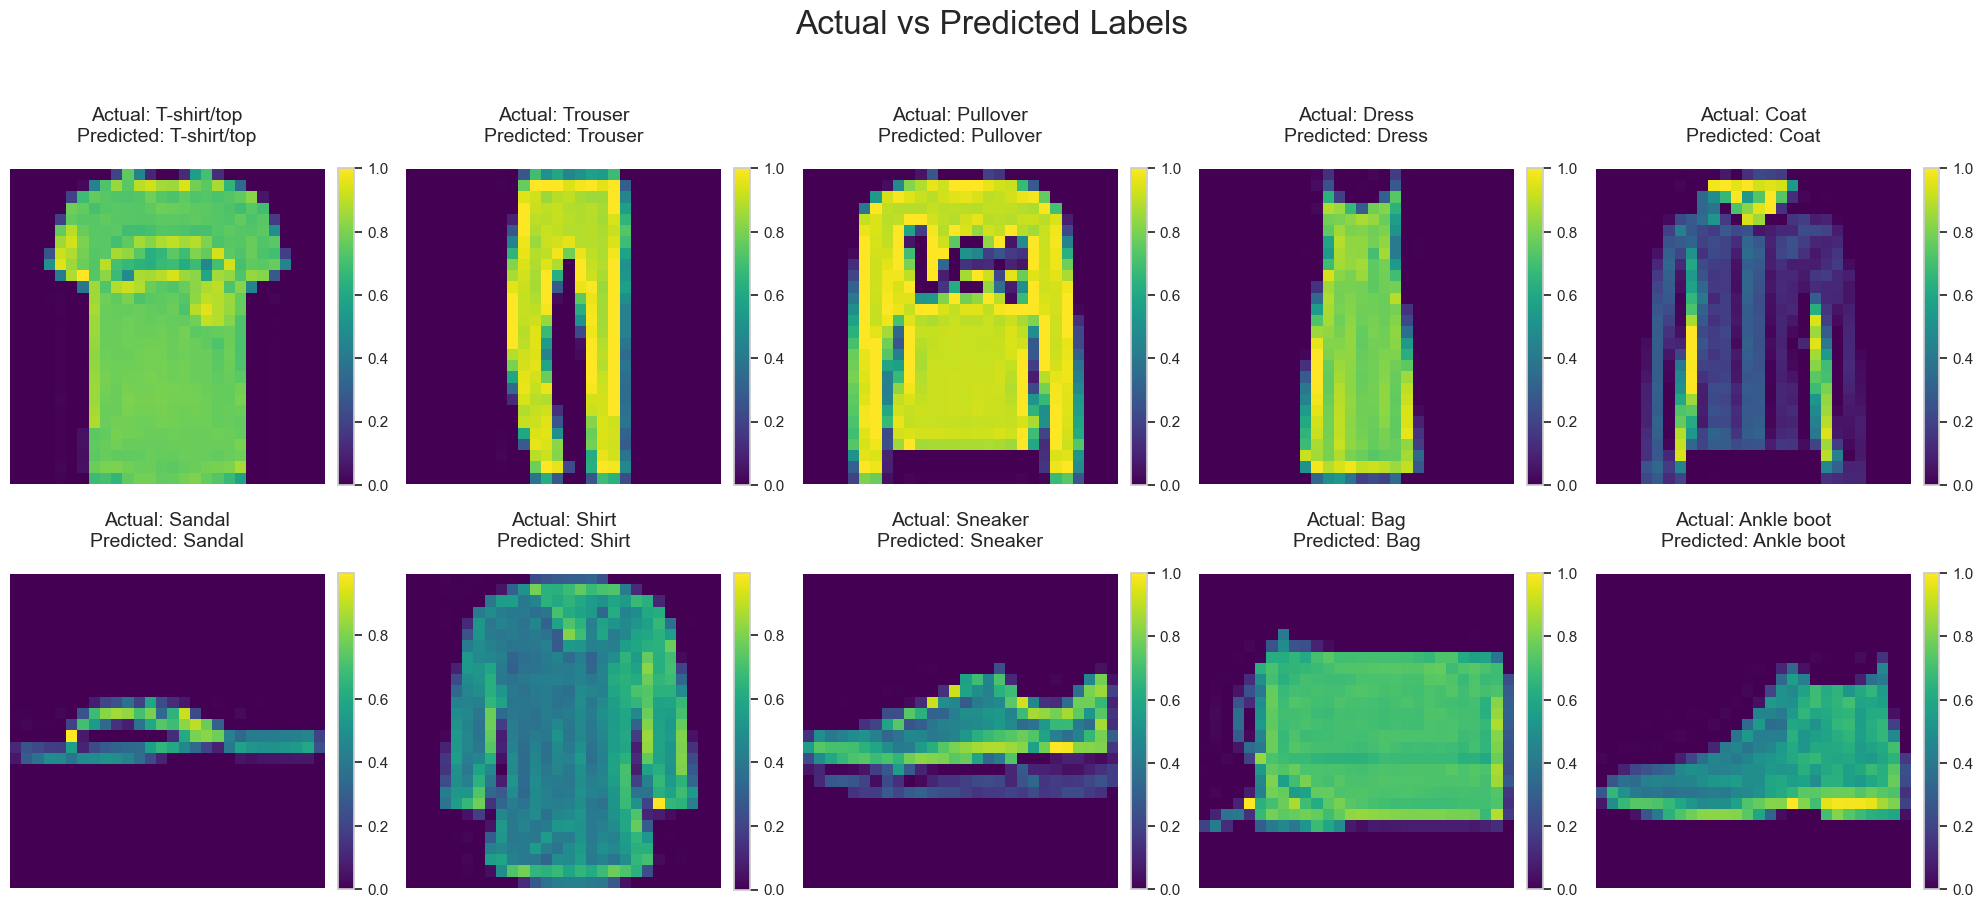

In [212]:

# Improved method to get indices of the first image of each class
indices = [np.where(np.array(test_set.targets) == i)[0][0] for i in range(class_count)]

# Use list comprehension to get the images
class_images = [test_set[i][0] for i in indices]

# Convert class_images to a tensor and move to device
class_images_tensor = torch.stack(class_images).to(device)

# Make predictions using the trained model
with torch.no_grad():
    class_predictions = model(class_images_tensor, parameters)

# Get the predicted labels
predicted_labels = torch.argmax(class_predictions, dim=1).cpu().numpy()

# Create a grid for the subplots
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('Actual vs Predicted Labels', fontsize=24)

# Plot the images with actual and predicted labels
for i, ax in enumerate(axes.flat):
    im = ax.imshow(class_images[i].permute(1, 2, 0).cpu(), cmap='viridis')  # Use 'viridis' colormap
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add color bar to each image with custom size
    ax.set_title(f"Actual: {test_set.classes[i]}\nPredicted: {test_set.classes[predicted_labels[i]]}", fontsize=14, pad=20)  # Increase font size and add padding
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
